In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
import time
warnings.filterwarnings('ignore')

data = pd.read_csv('/Users/mattjohnson/Desktop/Python 2018/Untitled Folder/SisFall/big_acm_data.csv')
data = data.drop('Unnamed: 0', axis=1)

In [7]:
adults = ['SA01','SA02','SA03','SA04','SA05','SA06','SA07','SA08','SA09','SA10','SA11','SA12','SA13','SA14','SA15',
 'SA16','SA17','SA18','SA19','SA20','SA21','SA22', 'SA23']
elderly = ['SE01','SE02','SE03','SE04','SE05','SE06','SE07','SE08','SE09','SE10','SE11','SE12','SE13','SE14','SE15']

dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']
falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']

#activ_label = {'STD':1,'WAL':2,'JOG':3,'JUM':4,'STU':5,'STN':6,'SCH':7,'SIT':8,'CHU':9,'CSI':10,'CSO':11,
#'LYI':12,'FOL':0,'FKL':0,'BSC':0,'SDL':0}
#Label = {0:'Fall',1:'Stand',2:'Walk',3:'Jog',4:'Jump',5:'up_stair',6:'down_stair',
#         7:'stand2sit',8:'sitting',9:'sit2stand',10:'CSI',11:'CSO',12:'LYI'}

In [3]:
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,activity,subject,trial,filename
0,9,-18,240,-12,74,-2,45,-77,1042,D14,SE11,R01,D14_SE11_R01.txt
1,9,-23,241,-14,73,-1,45,-80,1044,D14,SE11,R01,D14_SE11_R01.txt
2,9,-19,241,-13,73,-2,45,-78,1046,D14,SE11,R01,D14_SE11_R01.txt
3,8,-20,243,-15,71,-2,47,-78,1047,D14,SE11,R01,D14_SE11_R01.txt
4,8,-22,241,-14,69,-2,44,-83,1048,D14,SE11,R01,D14_SE11_R01.txt


In [24]:
#subjectList = list(data['subject'].value_counts().index)
subjectList = adults[:] # just adults for now

trialList = list(data['trial'].value_counts().index)

#activityList = list(df['activity'].value_counts().index)
activityList = falls[:] # just do falls for now

print( len(subjectList)*len(trialList)*len(activityList) )

2070


## starting with adult falls

In [25]:
start = time.time()
df = data.copy()
combinationList = []

i=0
for s in subjectList:
    for t in trialList:
        for a in activityList:
            tempdf = df[ (df['subject']==s) & (df['trial']==t) & (df['activity']==a)]
    
            if len(tempdf) != 0:
                combinationList.append(tempdf)
                #print('appending')

print(len(combinationList))
print ('Completed... It took', time.time()-start, 'seconds.')

1723
Completed... It took 5650.688654661179 seconds.


In [34]:
copyList = combinationList[:]

'SA01'

In [36]:
i=0
for dframe in copyList:
    print('i:', i, '-', dframe.iloc[0]['subject'], '-', dframe.iloc[0]['activity'],
         '-', dframe.iloc[0]['trial'])
    i+=1

i: 0 - SA01 - F01 - R01
i: 1 - SA01 - F02 - R01
i: 2 - SA01 - F03 - R01
i: 3 - SA01 - F04 - R01
i: 4 - SA01 - F05 - R01
i: 5 - SA01 - F06 - R01
i: 6 - SA01 - F07 - R01
i: 7 - SA01 - F08 - R01
i: 8 - SA01 - F09 - R01
i: 9 - SA01 - F10 - R01
i: 10 - SA01 - F11 - R01
i: 11 - SA01 - F12 - R01
i: 12 - SA01 - F13 - R01
i: 13 - SA01 - F14 - R01
i: 14 - SA01 - F15 - R01
i: 15 - SA01 - F01 - R05
i: 16 - SA01 - F02 - R05
i: 17 - SA01 - F03 - R05
i: 18 - SA01 - F04 - R05
i: 19 - SA01 - F05 - R05
i: 20 - SA01 - F06 - R05
i: 21 - SA01 - F07 - R05
i: 22 - SA01 - F08 - R05
i: 23 - SA01 - F09 - R05
i: 24 - SA01 - F10 - R05
i: 25 - SA01 - F11 - R05
i: 26 - SA01 - F12 - R05
i: 27 - SA01 - F13 - R05
i: 28 - SA01 - F14 - R05
i: 29 - SA01 - F15 - R05
i: 30 - SA01 - F01 - R03
i: 31 - SA01 - F02 - R03
i: 32 - SA01 - F03 - R03
i: 33 - SA01 - F04 - R03
i: 34 - SA01 - F05 - R03
i: 35 - SA01 - F06 - R03
i: 36 - SA01 - F07 - R03
i: 37 - SA01 - F08 - R03
i: 38 - SA01 - F09 - R03
i: 39 - SA01 - F10 - R03
i: 40 - SA

i: 408 - SA06 - F04 - R03
i: 409 - SA06 - F05 - R03
i: 410 - SA06 - F06 - R03
i: 411 - SA06 - F07 - R03
i: 412 - SA06 - F08 - R03
i: 413 - SA06 - F09 - R03
i: 414 - SA06 - F10 - R03
i: 415 - SA06 - F11 - R03
i: 416 - SA06 - F12 - R03
i: 417 - SA06 - F13 - R03
i: 418 - SA06 - F14 - R03
i: 419 - SA06 - F15 - R03
i: 420 - SA06 - F01 - R04
i: 421 - SA06 - F02 - R04
i: 422 - SA06 - F03 - R04
i: 423 - SA06 - F04 - R04
i: 424 - SA06 - F05 - R04
i: 425 - SA06 - F06 - R04
i: 426 - SA06 - F07 - R04
i: 427 - SA06 - F08 - R04
i: 428 - SA06 - F09 - R04
i: 429 - SA06 - F10 - R04
i: 430 - SA06 - F11 - R04
i: 431 - SA06 - F12 - R04
i: 432 - SA06 - F13 - R04
i: 433 - SA06 - F14 - R04
i: 434 - SA06 - F15 - R04
i: 435 - SA06 - F01 - R02
i: 436 - SA06 - F02 - R02
i: 437 - SA06 - F03 - R02
i: 438 - SA06 - F04 - R02
i: 439 - SA06 - F05 - R02
i: 440 - SA06 - F06 - R02
i: 441 - SA06 - F07 - R02
i: 442 - SA06 - F08 - R02
i: 443 - SA06 - F09 - R02
i: 444 - SA06 - F10 - R02
i: 445 - SA06 - F11 - R02
i: 446 - SA0

i: 755 - SA11 - F06 - R01
i: 756 - SA11 - F07 - R01
i: 757 - SA11 - F08 - R01
i: 758 - SA11 - F09 - R01
i: 759 - SA11 - F10 - R01
i: 760 - SA11 - F11 - R01
i: 761 - SA11 - F12 - R01
i: 762 - SA11 - F13 - R01
i: 763 - SA11 - F14 - R01
i: 764 - SA11 - F15 - R01
i: 765 - SA11 - F01 - R05
i: 766 - SA11 - F02 - R05
i: 767 - SA11 - F03 - R05
i: 768 - SA11 - F04 - R05
i: 769 - SA11 - F05 - R05
i: 770 - SA11 - F06 - R05
i: 771 - SA11 - F07 - R05
i: 772 - SA11 - F08 - R05
i: 773 - SA11 - F09 - R05
i: 774 - SA11 - F10 - R05
i: 775 - SA11 - F11 - R05
i: 776 - SA11 - F12 - R05
i: 777 - SA11 - F13 - R05
i: 778 - SA11 - F14 - R05
i: 779 - SA11 - F15 - R05
i: 780 - SA11 - F01 - R03
i: 781 - SA11 - F02 - R03
i: 782 - SA11 - F03 - R03
i: 783 - SA11 - F04 - R03
i: 784 - SA11 - F05 - R03
i: 785 - SA11 - F06 - R03
i: 786 - SA11 - F07 - R03
i: 787 - SA11 - F08 - R03
i: 788 - SA11 - F09 - R03
i: 789 - SA11 - F10 - R03
i: 790 - SA11 - F11 - R03
i: 791 - SA11 - F12 - R03
i: 792 - SA11 - F13 - R03
i: 793 - SA1

i: 1117 - SA15 - F08 - R02
i: 1118 - SA15 - F09 - R02
i: 1119 - SA15 - F10 - R02
i: 1120 - SA15 - F11 - R02
i: 1121 - SA15 - F12 - R02
i: 1122 - SA15 - F13 - R02
i: 1123 - SA15 - F14 - R02
i: 1124 - SA15 - F15 - R02
i: 1125 - SA16 - F01 - R01
i: 1126 - SA16 - F02 - R01
i: 1127 - SA16 - F03 - R01
i: 1128 - SA16 - F04 - R01
i: 1129 - SA16 - F05 - R01
i: 1130 - SA16 - F06 - R01
i: 1131 - SA16 - F07 - R01
i: 1132 - SA16 - F08 - R01
i: 1133 - SA16 - F09 - R01
i: 1134 - SA16 - F10 - R01
i: 1135 - SA16 - F11 - R01
i: 1136 - SA16 - F12 - R01
i: 1137 - SA16 - F13 - R01
i: 1138 - SA16 - F14 - R01
i: 1139 - SA16 - F15 - R01
i: 1140 - SA16 - F01 - R05
i: 1141 - SA16 - F02 - R05
i: 1142 - SA16 - F03 - R05
i: 1143 - SA16 - F04 - R05
i: 1144 - SA16 - F05 - R05
i: 1145 - SA16 - F06 - R05
i: 1146 - SA16 - F07 - R05
i: 1147 - SA16 - F08 - R05
i: 1148 - SA16 - F09 - R05
i: 1149 - SA16 - F10 - R05
i: 1150 - SA16 - F11 - R05
i: 1151 - SA16 - F12 - R05
i: 1152 - SA16 - F13 - R05
i: 1153 - SA16 - F14 - R05
i

i: 1450 - SA20 - F11 - R05
i: 1451 - SA20 - F12 - R05
i: 1452 - SA20 - F13 - R05
i: 1453 - SA20 - F14 - R05
i: 1454 - SA20 - F15 - R05
i: 1455 - SA20 - F02 - R03
i: 1456 - SA20 - F03 - R03
i: 1457 - SA20 - F04 - R03
i: 1458 - SA20 - F05 - R03
i: 1459 - SA20 - F06 - R03
i: 1460 - SA20 - F07 - R03
i: 1461 - SA20 - F08 - R03
i: 1462 - SA20 - F09 - R03
i: 1463 - SA20 - F10 - R03
i: 1464 - SA20 - F11 - R03
i: 1465 - SA20 - F12 - R03
i: 1466 - SA20 - F13 - R03
i: 1467 - SA20 - F14 - R03
i: 1468 - SA20 - F15 - R03
i: 1469 - SA20 - F01 - R04
i: 1470 - SA20 - F02 - R04
i: 1471 - SA20 - F03 - R04
i: 1472 - SA20 - F04 - R04
i: 1473 - SA20 - F05 - R04
i: 1474 - SA20 - F06 - R04
i: 1475 - SA20 - F07 - R04
i: 1476 - SA20 - F08 - R04
i: 1477 - SA20 - F09 - R04
i: 1478 - SA20 - F11 - R04
i: 1479 - SA20 - F12 - R04
i: 1480 - SA20 - F13 - R04
i: 1481 - SA20 - F14 - R04
i: 1482 - SA20 - F15 - R04
i: 1483 - SA20 - F01 - R02
i: 1484 - SA20 - F02 - R02
i: 1485 - SA20 - F03 - R02
i: 1486 - SA20 - F04 - R02
i

In [48]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 4
fs = 200.0       # sample rate, Hz
cutoff = 5.0  # desired cutoff frequency of the filter, Hz

In [45]:
#tests if indexes of a dataframe are consecutive, returns boolean, prints message
def test_if_consecutive(dataframe):
    hopefully_ones = pd.DataFrame(dataframe.index).diff()
    t1 = int(hopefully_ones[0][1:].sum())
    t2 = len(hopefully_ones)-1
    
    if t1 == t2:
        return True
    else:
        print('Contains non-consecutive data!')
        return False

In [152]:
start = time.time()
fallList = []
fallIdList = []

for dframe in copyList:
    if test_if_consecutive(dframe):
        
        f_type = dframe.iloc[0]['activity']
        fallIdList.append(f_type)
    
        num_df = dframe[['x1', 'y1', 'z1']]
        supp_df = dframe[['activity', 'subject', 'trial']]
        
        for col in num_df.columns:
            num_df[col] = butter_lowpass_filter(num_df[col], cutoff, fs, order)
            num_df[col] = num_df[col].diff()[1:]
        
        num_df['y_mean200'] = num_df['y1'].rolling(200).mean()
        num_df['feat4'] = num_df['y1'] - num_df['y_mean200']
            
        # Sum vector magnitude (feature)
        num_df['A'] = num_df.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)
            
        # Sum vector magnitude on horizontal plane (feature)
        num_df['vec_mag_horiz'] = num_df.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[2]**2).round(3) , axis=1)
            
        num_df['Amax'] = num_df['A'].rolling(200).max()
        num_df['Amin'] = num_df['A'].rolling(200).min()
            
        # Maximum peak to peak acceleration amplitude
        num_df['peak_diff'] = num_df['Amax']-num_df['Amin']
            
        num_df['x_std'] = pd.rolling_std(num_df['x1'], 200)
        num_df['y_std'] = pd.rolling_std(num_df['y1'], 200)
        num_df['z_std'] = pd.rolling_std(num_df['z1'], 200)

        # feature C9 or F4 : standard deviation magnitude
        num_df['std_mag'] = num_df.apply(lambda row: np.sqrt( row.loc['x_std']**2 + row.loc['y_std']**2 + row.loc['z_std']**2).round(3) , axis=1)

        num_df['J3'] = num_df['A'].rolling(200).max() * num_df['std_mag'].rolling(200).max()**2
            
    newdf = pd.concat([num_df[['x1', 'y1', 'z1', 'A', 'feat4', 'std_mag', 'J3', 'peak_diff']], supp_df], axis=1)
    fallList.append(newdf)
    if (len(fallList) % 50) == 0:
        print ('found ', len(fallList))
        
        
print ('Completed... It took', time.time()-start, 'seconds.')
# Completed... It took 3040.2996661663055 seconds.

found  50
found  100
found  150
found  200
found  250
found  300
found  350
found  400
found  450
found  500
found  550
found  600
found  650
found  700
found  750
found  800
found  850
found  900
found  950
found  1000
found  1050
found  1100
found  1150
found  1200
found  1250
found  1300
found  1350
found  1400
found  1450
found  1500
found  1550
found  1600
found  1650
found  1700
Completed... It took 3040.2996661663055 seconds.


In [153]:
my_list = fallIdList[:]
myFallList = fallList[:]

falls = ['F01','F02','F03','F04','F05','F06','F07','F08','F09','F10','F11','F12','F13','F14','F15']

fall_indices = []

for fall in falls:
    indices = [i for i, x in enumerate(my_list) if x == fall]
    fall_indices.append(indices)

In [218]:
fall_df = pd.DataFrame(columns=falls)

j1df = pd.DataFrame()
#j2df = pd.DataFrame()
#j3df = pd.DataFrame()

for i in range(0,len(falls)):
    f_indices = fall_indices[i] # ex. 5, 10, 15, 20, ... 
    
    for j in range(0,len(f_indices)):
        j1df = pd.concat([j1df, myFallList[j][['A', 'std_mag', 'J3', 'feat4', 'peak_diff']]])
        #j2df = pd.concat([j2df, myFallList[j]['std_mag', ]])
        #j3df = pd.concat([j3df, myFallList[j][['J3', 'activity']]])
    #print(len(j1df), len(j2df), len(j3df))

In [156]:
feature_df = pd.concat([j1df, j2df, j3df], axis=1)
feature_df.columns = ['J1', 'J2', 'J3', 'activity']
print(feature_df.shape)
feat_df = feature_df.dropna()
print(feat_df.shape)


(5168970, 4)
(4481493, 4)


In [217]:
feat_df['activity'].value_counts()
feat_df.head()

fallList[0].head()

,x1,y1,z1,A,feat4,std_mag,J3,peak_diff,activity,subject,trial
13056354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F01,SA01,R01
13056355,-0.001946,-0.061121,-0.005865,0.061,NaN,NaN,NaN,NaN,F01,SA01,R01
13056356,-0.006498,-0.229599,-0.021669,0.231,NaN,NaN,NaN,NaN,F01,SA01,R01
13056357,-0.014393,-0.585491,-0.054305,0.588,NaN,NaN,NaN,NaN,F01,SA01,R01
13056358,-0.024524,-1.172398,-0.107074,1.178,NaN,NaN,NaN,NaN,F01,SA01,R01


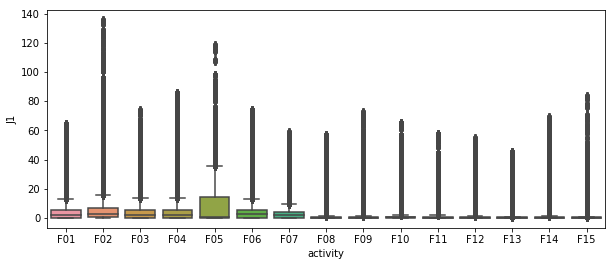

In [197]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J1', data=feat_df);

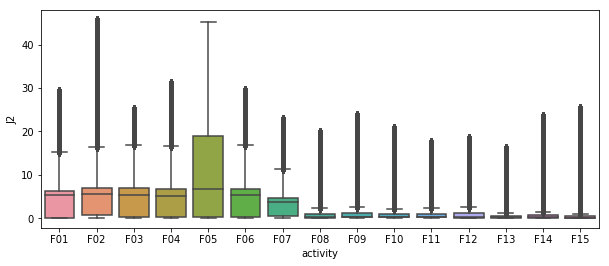

In [198]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J2', data=feat_df);

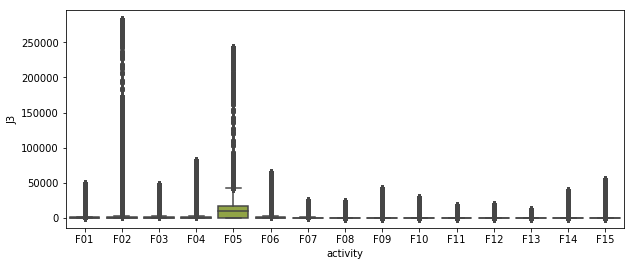

In [199]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J3', data=feat_df);

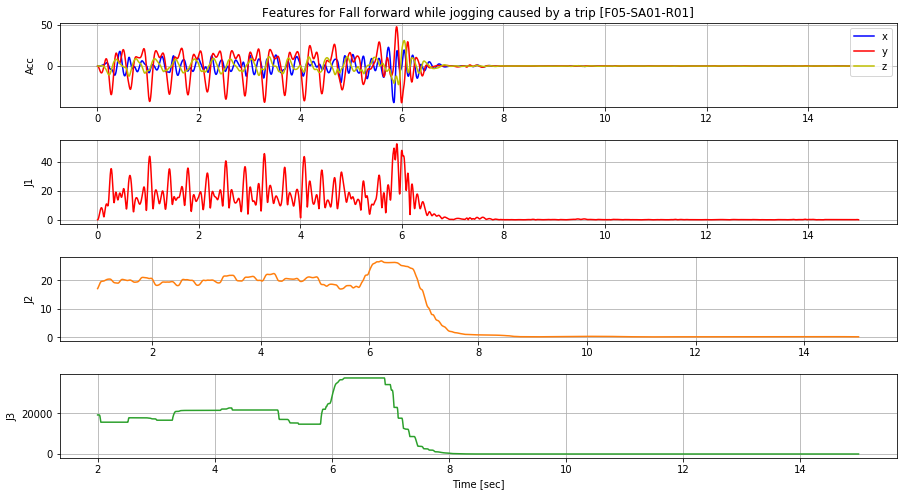

In [171]:
curr_df = myFallList[4]

#curr_df = F01_list[0].copy()

fs = 200.0  
T = 15.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

plt.figure(figsize=(15,8))


plt.subplot(4, 1, 1)
plt.plot(t, curr_df['x1'], 'b-', label='x')
plt.plot(t, curr_df['y1'], 'r-', label='y')
plt.plot(t, curr_df['z1'], 'y-', label='z')
plt.grid()
plt.legend()
plt.ylabel('Acc')
plt.title("Features for Fall forward while jogging caused by a trip [F05-SA01-R01]")


plt.subplot(4, 1, 2)
plt.plot(t, curr_df['A'], 'r-', label='J1')
plt.grid()
plt.ylabel('J1')


plt.subplot(4, 1, 3)
plt.plot(t, curr_df['std_mag'], 'C1',  label='J2')
plt.grid()
plt.ylabel('J2')

plt.subplot(4, 1, 4)
plt.plot(t, curr_df['J3'], 'C2',  label='J2')
plt.xlabel('Time [sec]')
plt.grid()
plt.ylabel('J3')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [170]:
myFallList[4].head()

,x1,y1,z1,A,feat4,std_mag,J3,peak_diff,activity,subject,trial
12927356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F05,SA01,R01
12927357,-0.003606,-0.046065,-0.002989,0.046,NaN,NaN,NaN,NaN,F05,SA01,R01
12927358,-0.012613,-0.170425,-0.010695,0.171,NaN,NaN,NaN,NaN,F05,SA01,R01
12927359,-0.029433,-0.426642,-0.025424,0.428,NaN,NaN,NaN,NaN,F05,SA01,R01
12927360,-0.053148,-0.836545,-0.046196,0.840,NaN,NaN,NaN,NaN,F05,SA01,R01


## Adult - Daily Activity Data

In [172]:
subjectList = adults[:] # just adults for now
trialList = list(data['trial'].value_counts().index)
activityList = dailies[:] # dailies
print( len(subjectList)*len(trialList)*len(activityList) )

2622


In [173]:
start = time.time()
df = data.copy()
dailyList = []

i=0
for s in subjectList:
    for t in trialList:
        for a in activityList:
            tempdf = df[ (df['subject']==s) & (df['trial']==t) & (df['activity']==a)]
    
            if len(tempdf) != 0:
                dailyList.append(tempdf)
                #print('appending')
    print('s:', s, 'time:', time.time()-start, 'seconds.')

print(len(dailyList))
print ('Completed... It took', time.time()-start, 'seconds.')
#Completed... It took 7661.250473976135 seconds.

s: SA01 time: 325.39772605895996 seconds.
s: SA02 time: 645.7875530719757 seconds.
s: SA03 time: 954.8122160434723 seconds.
s: SA04 time: 1264.2346849441528 seconds.
s: SA05 time: 1590.1216399669647 seconds.
s: SA06 time: 1936.1426870822906 seconds.
s: SA07 time: 2278.9223189353943 seconds.
s: SA08 time: 2651.99512386322 seconds.
s: SA09 time: 3011.3034172058105 seconds.
s: SA10 time: 3347.649167776108 seconds.
s: SA11 time: 3681.757655143738 seconds.
s: SA12 time: 4026.6429319381714 seconds.
s: SA13 time: 4353.5460159778595 seconds.
s: SA14 time: 4679.63466501236 seconds.
s: SA15 time: 5028.362786054611 seconds.
s: SA16 time: 5365.973719120026 seconds.
s: SA17 time: 5725.300110816956 seconds.
s: SA18 time: 6065.013015031815 seconds.
s: SA19 time: 6395.737722873688 seconds.
s: SA20 time: 6732.171980142593 seconds.
s: SA21 time: 7046.224163770676 seconds.
s: SA22 time: 7353.729870080948 seconds.
s: SA23 time: 7661.2279460430145 seconds.
1694
Completed... It took 7661.250473976135 second

In [175]:
start = time.time()
dailyActList = []
dailyIdList = []
copyList2 = dailyList[:]

for dframe in copyList2:
    if test_if_consecutive(dframe):
        
        f_type = dframe.iloc[0]['activity']
        dailyIdList.append(f_type)
    
        num_df = dframe[['x1', 'y1', 'z1']]
        supp_df = dframe[['activity', 'subject', 'trial']]
        
        for col in num_df.columns:
            num_df[col] = butter_lowpass_filter(num_df[col], cutoff, fs, order)
            num_df[col] = num_df[col].diff()[1:]
        
        num_df['y_mean200'] = num_df['y1'].rolling(200).mean()
        num_df['feat4'] = num_df['y1'] - num_df['y_mean200']
            
        # Sum vector magnitude (feature)
        num_df['A'] = num_df.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)
            
        # Sum vector magnitude on horizontal plane (feature)
        num_df['vec_mag_horiz'] = num_df.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[2]**2).round(3) , axis=1)
            
        num_df['Amax'] = num_df['A'].rolling(200).max()
        num_df['Amin'] = num_df['A'].rolling(200).min()
            
        # Maximum peak to peak acceleration amplitude
        num_df['peak_diff'] = num_df['Amax']-num_df['Amin']
            
        num_df['x_std'] = pd.rolling_std(num_df['x1'], 200)
        num_df['y_std'] = pd.rolling_std(num_df['y1'], 200)
        num_df['z_std'] = pd.rolling_std(num_df['z1'], 200)

        # feature C9 or F4 : standard deviation magnitude
        num_df['std_mag'] = num_df.apply(lambda row: np.sqrt( row.loc['x_std']**2 + row.loc['y_std']**2 + row.loc['z_std']**2).round(3) , axis=1)

        num_df['J3'] = num_df['A'].rolling(200).max() * num_df['std_mag'].rolling(200).max()**2
            
    newdf = pd.concat([num_df, supp_df], axis=1)
    dailyActList.append(newdf)
    if (len(dailyActList) % 50) == 0:
        print ('found ', len(dailyActList))
        
        
print ('Completed... It took', time.time()-start, 'seconds.')
# Completed... It took 3531.5273621082306 seconds.

found  50
found  100
found  150
found  200
found  250
found  300
found  350
found  400
found  450
found  500
found  550
found  600
found  650
found  700
found  750
found  800
found  850
found  900
found  950
found  1000
found  1050
found  1100
found  1150
found  1200
found  1250
found  1300
found  1350
found  1400
found  1450
found  1500
found  1550
found  1600
found  1650
Completed... It took 3531.5273621082306 seconds.


In [177]:
dailies = ['D01','D02','D03','D04','D05','D06','D07','D08','D09','Da10','D11','D12','D13','D14','D15',
 'D16','D17','D18','D19']

my_idlist = dailyIdList[:]
myDailyList = dailyActList[:]

daily_indices = []

for da in dailies:
    indices = [i for i, x in enumerate(my_idlist) if x == da]
    daily_indices.append(indices)

In [183]:
#myDailyList[0]

In [182]:
daily_df = pd.DataFrame(columns=dailies)

j1dadf = pd.DataFrame()
#j2dadf = pd.DataFrame()
#j3dadf = pd.DataFrame()

for i in range(0,len(dailies)):
    d_indices = daily_indices[i] # ex. 5, 10, 15, 20, ... 
    
    for j in range(0,len(d_indices)):
        j1dadf = pd.concat([j1dadf, myDailyList[j][['A', 'std_mag', 'J3', 'feat4', 'activity']]])
        #j2dadf = pd.concat([j2dadf, myFallList[j]['std_mag']])
        #j3dadf = pd.concat([j3dadf, myFallList[j][['J3', 'feat4', 'activity']]])
    #print(len(j1df), len(j2df), len(j3df))

##  Falls vs daily activities for Adults

#### A/J1 - Sum Vector Magnitude
Threshold ~ 55-60?

In [186]:
daily_feats = j1dadf.dropna()

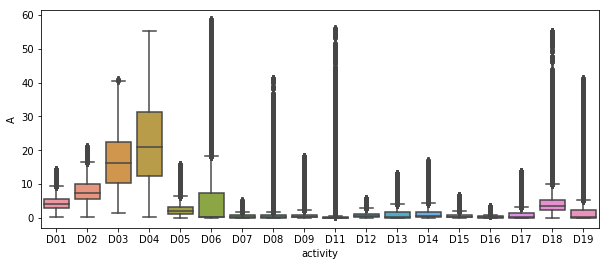

In [212]:
a4_dims = (10, 4)
#plt.subplot(1,2,1)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='A', data=daily_feats);

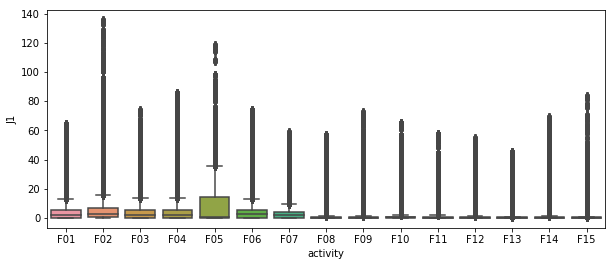

In [213]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J1', data=feat_df);

#### probably nothing yet, need to get kalman filter working

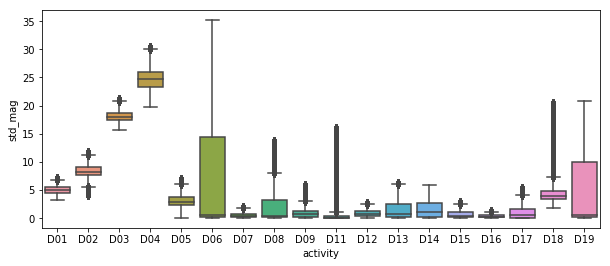

In [201]:
a4_dims = (10, 4)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='std_mag', data=daily_feats);

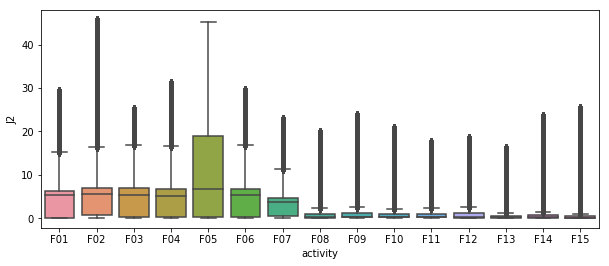

In [214]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J2', data=feat_df);

#### J3, also probably meaningless 

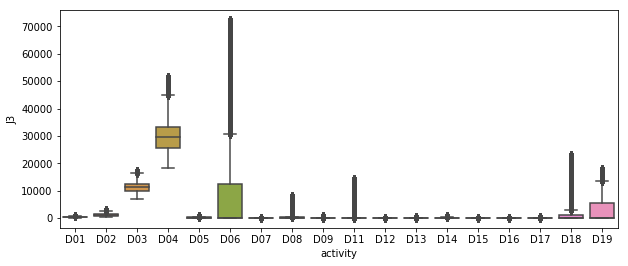

In [202]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J3', data=daily_feats);

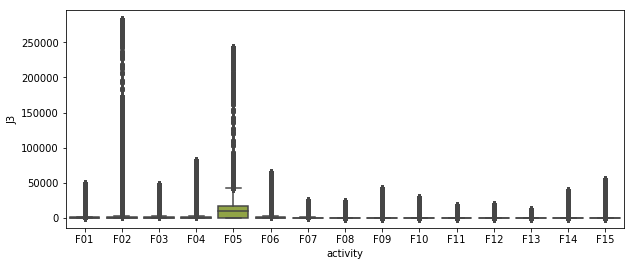

In [215]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='J3', data=feat_df);

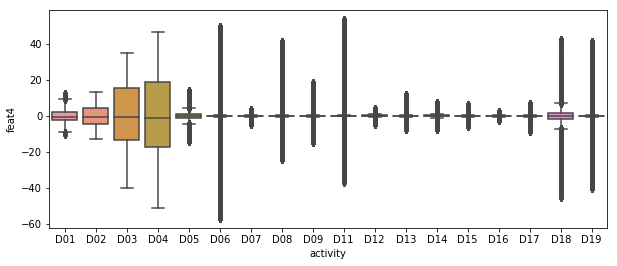

In [203]:
a4_dims = (10, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x='activity', y='feat4', data=daily_feats);

In [216]:
#myDailyList[0]

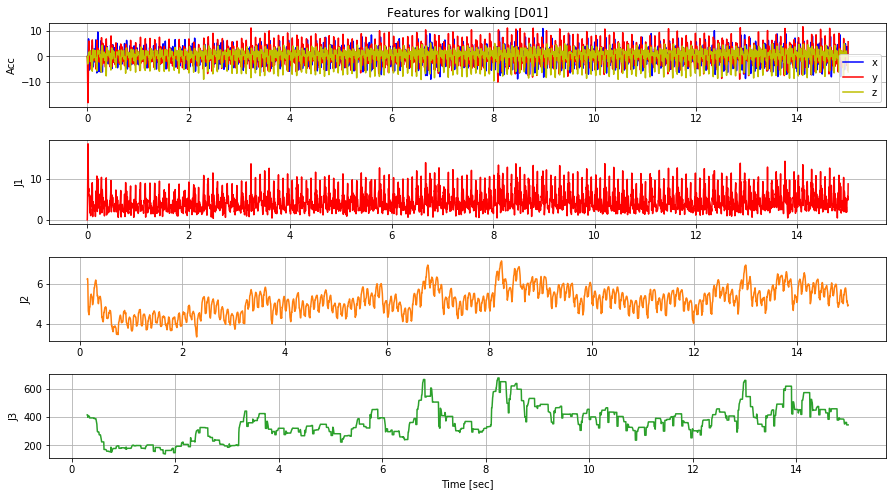

In [208]:
curr_df = myDailyList[0]

#curr_df = F01_list[0].copy()

fs = 200.0  
T = 15.0         # seconds
#n = int(T * fs) # total number of samples
n = len(curr_df)
t = np.linspace(0, T, n, endpoint=False)

plt.figure(figsize=(15,8))


plt.subplot(4, 1, 1)
plt.plot(t, curr_df['x1'], 'b-', label='x')
plt.plot(t, curr_df['y1'], 'r-', label='y')
plt.plot(t, curr_df['z1'], 'y-', label='z')
plt.grid()
plt.legend()
plt.ylabel('Acc')
plt.title("Features for walking [D01]")


plt.subplot(4, 1, 2)
plt.plot(t, curr_df['A'], 'r-', label='J1')
plt.grid()
plt.ylabel('J1')


plt.subplot(4, 1, 3)
plt.plot(t, curr_df['std_mag'], 'C1',  label='J2')
plt.grid()
plt.ylabel('J2')

plt.subplot(4, 1, 4)
plt.plot(t, curr_df['J3'], 'C2',  label='J2')
plt.xlabel('Time [sec]')
plt.grid()
plt.ylabel('J3')

plt.subplots_adjust(hspace=0.4)
plt.show()

19999

In [100]:
tempd.shape

(319279, 1)

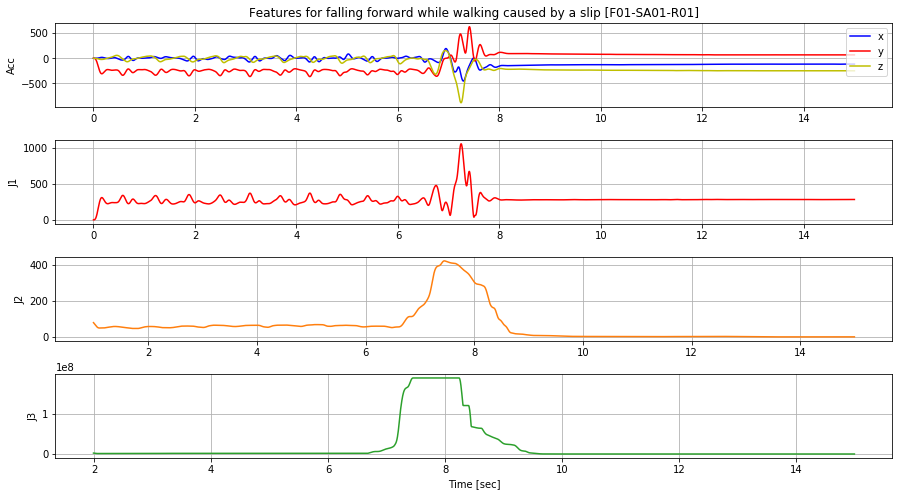

In [85]:
#curr_df = F01_list[0].copy()

fs = 200.0  
T = 15.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)

plt.figure(figsize=(15,8))


plt.subplot(4, 1, 1)
plt.plot(t, curr_df['x1'], 'b-', label='x')
plt.plot(t, curr_df['y1'], 'r-', label='y')
plt.plot(t, curr_df['z1'], 'y-', label='z')
plt.grid()
plt.legend()
plt.ylabel('Acc')
plt.title("Features for falling forward while walking caused by a slip [F01-SA01-R01]")


plt.subplot(4, 1, 2)
plt.plot(t, curr_df['A'], 'r-', label='J1')
plt.grid()
plt.ylabel('J1')


plt.subplot(4, 1, 3)
plt.plot(t, curr_df['std_mag'], 'C1',  label='J2')
plt.grid()
plt.ylabel('J2')

plt.subplot(4, 1, 4)
plt.plot(t, curr_df['J3'], 'C2',  label='J2')
plt.xlabel('Time [sec]')
plt.grid()
plt.ylabel('J3')

plt.subplots_adjust(hspace=0.4)
plt.show()

In [75]:
F01_list[0].head()

,x1,y1,z1,A,std_mag,J3,peak_diff,activity,subject,trial
13056354,-0.000281,-0.008028,-0.000781,0.008,NaN,NaN,NaN,F01,SA01,R01
13056355,-0.002228,-0.069149,-0.006646,0.070,NaN,NaN,NaN,F01,SA01,R01
13056356,-0.008725,-0.298748,-0.028315,0.300,NaN,NaN,NaN,F01,SA01,R01
13056357,-0.023118,-0.884240,-0.082621,0.888,NaN,NaN,NaN,F01,SA01,R01
13056358,-0.047642,-2.056638,-0.189694,2.066,NaN,NaN,NaN,F01,SA01,R01


In [166]:
5000/200

25.0

In [170]:
filter_df = num_df.copy()

for col in filter_df.columns:
    filter_df[col] = butter_lowpass_filter(filter_df[col], cutoff, fs, order)

In [177]:
supp_df.head()

,activity,subject,trial
12766357,D17,SA01,R05
12766358,D17,SA01,R05
12766359,D17,SA01,R05
12766360,D17,SA01,R05
12766361,D17,SA01,R05


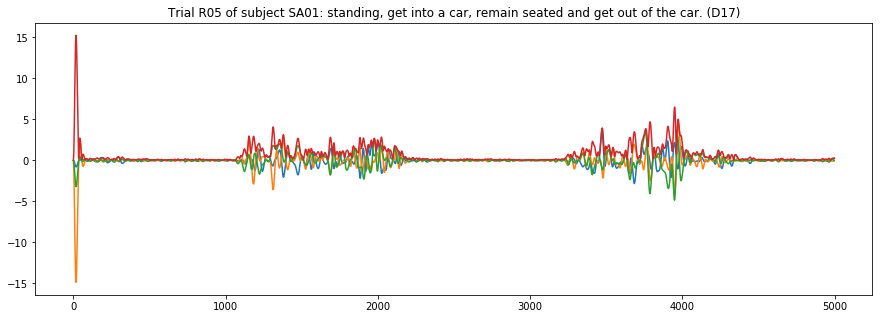

In [181]:
# differential/ removing bias
diff_df = filter_df.diff()[1:]
diff_df['A'] = diff_df.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)
diff_df.head()

f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
ax.plot(diff_df.reset_index(drop=True));
ax.set_title('Trial R05 of subject SA01: standing, get into a car, remain seated and get out of the car. (D17)');
# possibly set x axis to seconds (200hz, 5 seconds)

In [37]:
len(combinationList)

1723

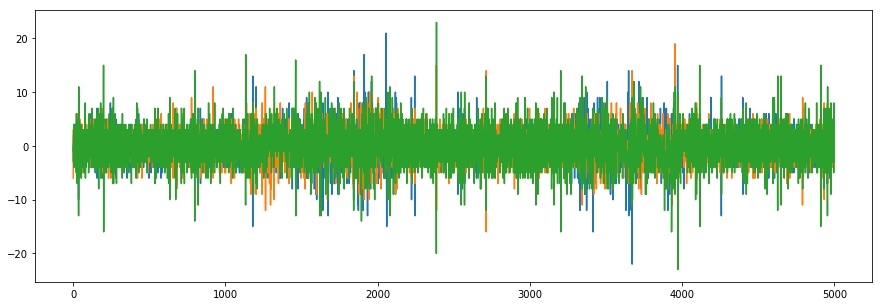

In [161]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(111)
#ax2 = f.add_subplot(312)
#ax3 = f.add_subplot(313)
diffy['A'] = diffy.apply(lambda row: np.sqrt( row.iloc[0]**2 + row.iloc[1]**2 + row.iloc[2]**2).round(3) , axis=1)

ax.plot(diffy[['x1', 'y1', 'z1']].reset_index(drop=True))
#ax2.plot(df2[['x2', 'y2', 'z2', 'A']]);
#ax3.plot(df3[['x3', 'y3', 'z3', 'A']]);
plt.subplots_adjust(hspace=0.5)

In [116]:
start = time.time()

df = data.copy()

fall_jog_list = []

for s in df['subject'].value_counts().index:
    for t in df['trial'].value_counts().index:
        for a in df['activity'].value_counts().index:
            tempdf = df[ (df['subject']==s) & (df['trial']==t) & (df['activity']==a)]
            ## put in code to not append if len = 0
            if len(tempdf) != 0:
                fall_jog_list.append(tempdf)
        break # temp
        
print(len(fall_jog_list))
print ('Completed... It took', time.time()-start, 'seconds.')

0
Completed... It took 4392.98743891716 seconds.
